In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random
SEED = 1234

dataset = pd.read_csv("/content/Pos MLs03b exames.csv")
dataset.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [4]:
# Teste de quantidade de valores null em cada coluna
dataset.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [5]:
dataset.shape

(569, 35)

In [6]:
x = dataset.drop(columns=["id", "diagnostico", "exame_33"])
y = dataset['diagnostico']

def create_model(x_new):
  random.seed(SEED)
  x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3)

  model = RandomForestClassifier(n_estimators=100)
  model.fit(x_train, y_train)

  acc = model.score(x_test, y_test)
  print(f"Resultado da acurácia é {acc * 100}%")

create_model(x)

Resultado da acurácia é 92.39766081871345%


In [7]:
x1 = pd.concat([x, y], axis=1)
x1.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,diagnostico
0,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,M


In [8]:
x1_plot = pd.melt(x1, id_vars="diagnostico", var_name="exames", value_name="valores")
x1_plot

,diagnostico,exames,valores
0,M,exame_1,17.99000
1,M,exame_1,20.57000
2,M,exame_1,19.69000
3,M,exame_1,11.42000
4,M,exame_1,20.29000
...,...,...,...
18203,M,exame_32,0.07115
18204,M,exame_32,0.06637
18205,M,exame_32,0.07820
18206,M,exame_32,0.12400


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

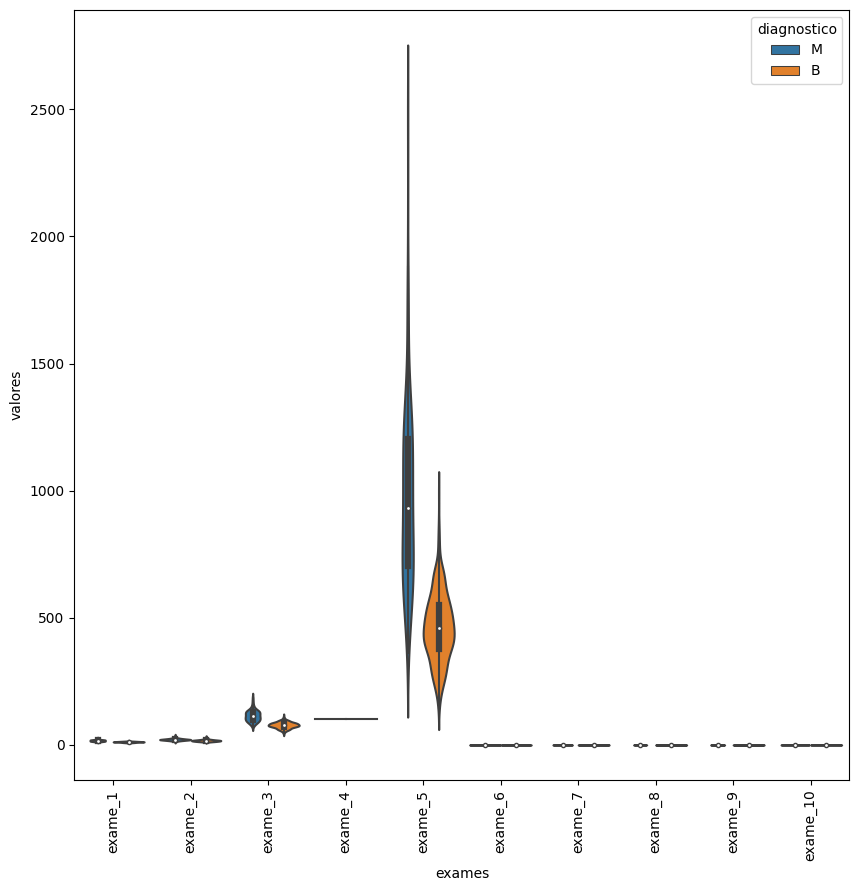

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_page1 = pd.concat([y, x.iloc[:, 0:10]], axis=1)
x1_plot = pd.melt(plot_page1, id_vars="diagnostico", var_name="exames", value_name="valores")

plt.figure(figsize=(10,10))
sns.violinplot(x = "exames", y = "valores", hue = "diagnostico", data = x1_plot)
plt.xticks(rotation = 90)

In [10]:
# Padronizando os dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x2 = scaler.transform(x)
x2 = pd.DataFrame(data = x2, columns=x.keys())
x2.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.110223e-16,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.421085e-14,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.110223e-16,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.421085e-14,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.110223e-16,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,1.421085e-14,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.110223e-16,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.421085e-14,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.110223e-16,0.729259,-0.868353,-0.397100


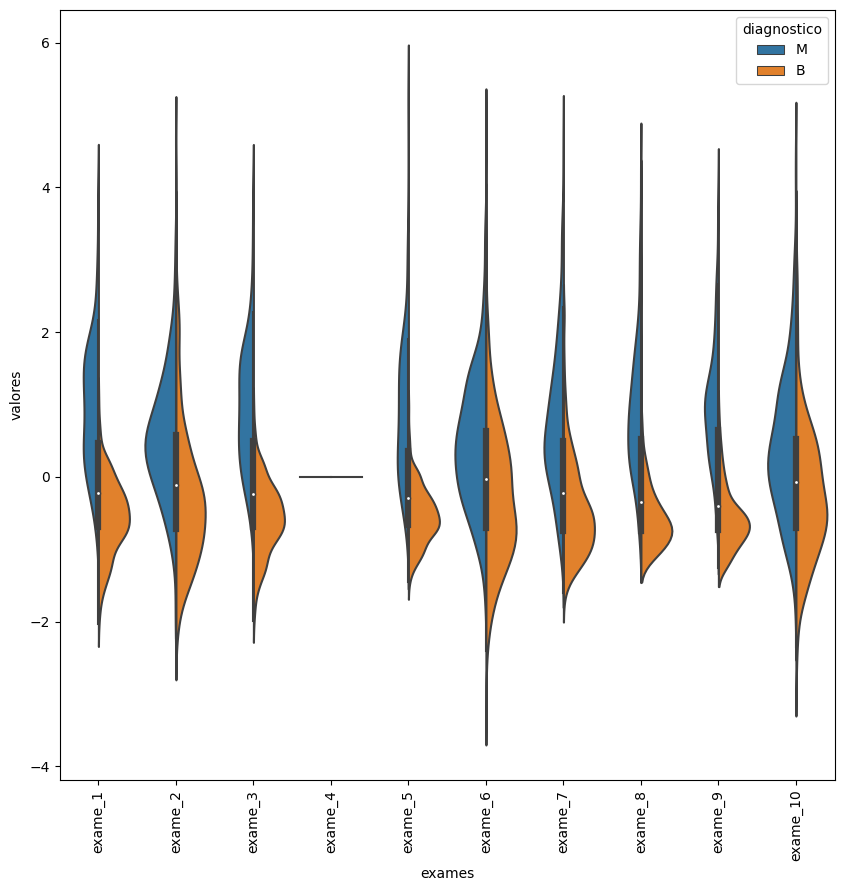

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_violin(x, start, end):

  plot_page = pd.concat([y, x.iloc[:, start:end]], axis=1)
  plot_page = pd.melt(plot_page, id_vars="diagnostico", var_name="exames", value_name="valores")
  plt.figure(figsize=(10,10))
  sns.violinplot(x = "exames", y = "valores", hue = "diagnostico", data = plot_page, split=True,)
  plt.xticks(rotation = 90)

plot_violin(x2, 0, 10)

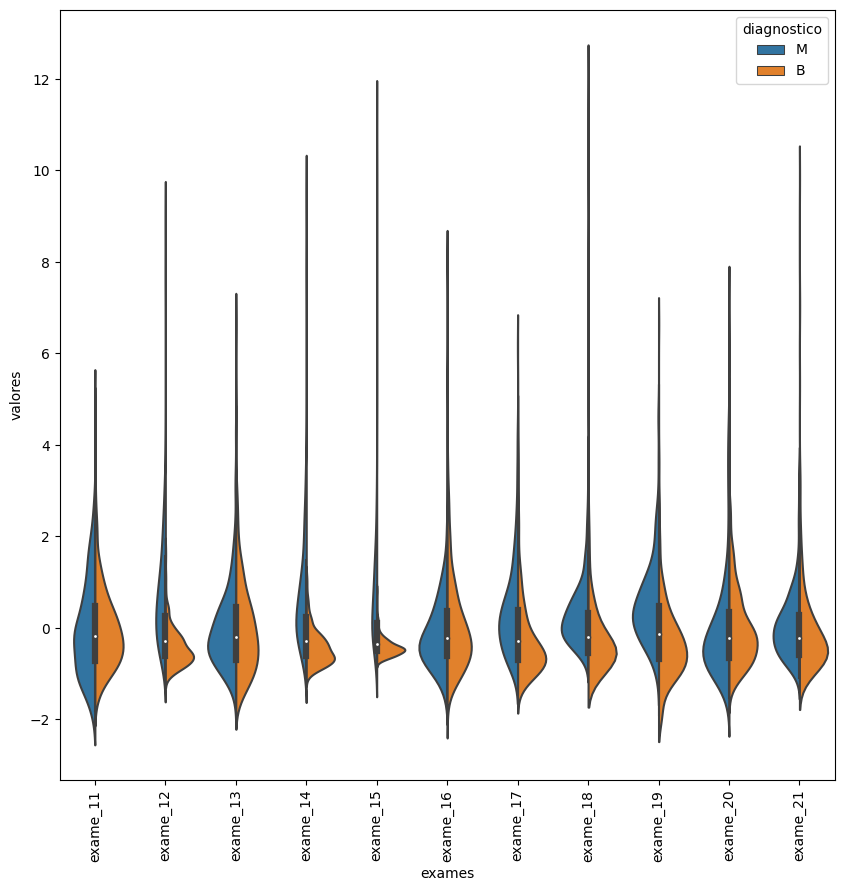

In [12]:
plot_violin(x2, 10, 21)

In [13]:
x3 = x2.drop(columns=["exame_29", "exame_4"])
create_model(x3)

Resultado da acurácia é 92.98245614035088%


In [14]:
# Matriz de correlação
x3.corr()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

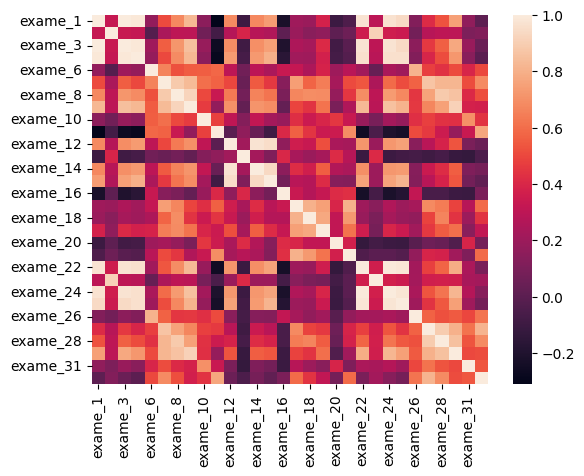

In [15]:
# Visualização da correlação com mapa de calor
sns.heatmap(x3.corr())

<Axes: >

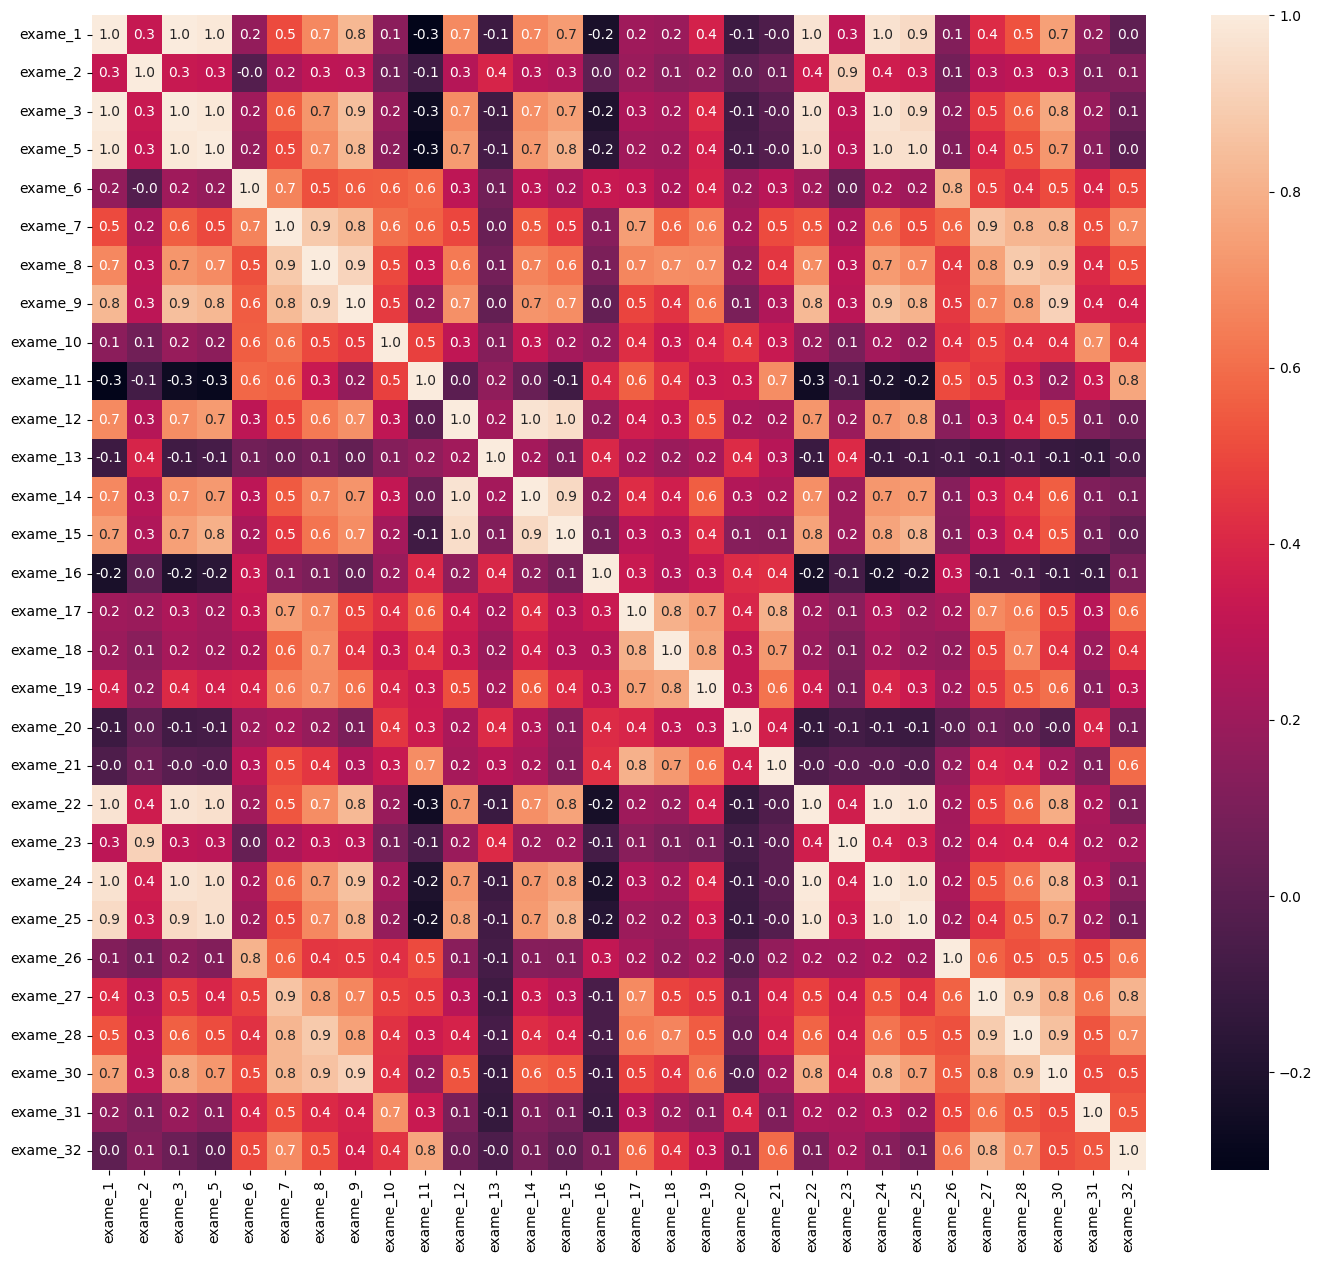

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,15))
sns.heatmap(x3.corr(), annot=True, fmt=".1f")

In [17]:
x4 = x3.drop(columns=["exame_3", "exame_24"])
create_model(x4)

Resultado da acurácia é 92.98245614035088%


In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select_kbest = SelectKBest(chi2, k = 5)
random.seed(SEED)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

select_kbest.fit(x_train, y_train)

x_train = select_kbest.transform(x_train)
x_test = select_kbest.transform(x_test)

x_test.shape

(171, 5)

In [19]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
print(f"Acurácia {model.score(x_test, y_test) * 100}%")

Acurácia 91.22807017543859%


In [20]:
# Matriz confusão
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, model.predict(x_test))
confusion_m

array([[102,   3],
       [ 12,  54]])

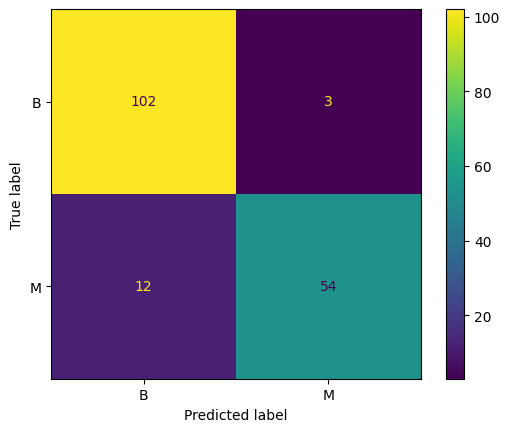

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_m, display_labels=["B", "M"])
cmd.plot()

In [22]:
from sklearn.feature_selection import RFE
random.seed(SEED)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

select_rfe = RFE(estimator=model, n_features_to_select=5, step=50)
select_rfe.fit(x_train, y_train)

rfe_train = select_rfe.transform(x_train)
rfe_test = select_rfe.transform(x_test)

model.fit(rfe_train, y_train)

print(f"Acurácia {model.score(rfe_test, y_test) * 100}%")


Acurácia 89.47368421052632%


In [23]:
from sklearn.feature_selection import RFECV
random.seed(SEED)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

select_rfe = RFECV(estimator=model, step=50, cv=10)
select_rfe.fit(x_train, y_train)

rfe_train = select_rfe.transform(x_train)
rfe_test = select_rfe.transform(x_test)

model.fit(rfe_train, y_train)

print(f"Acurácia {model.score(rfe_test, y_test) * 100}%")


Acurácia 92.98245614035088%


In [24]:
select_rfe.n_features_

32

In [25]:
from sklearn.model_selection import GridSearchCV

# Define a variação da parâmetros pro grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(rfe_train, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_


In [26]:
best_model

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5)

<Axes: >

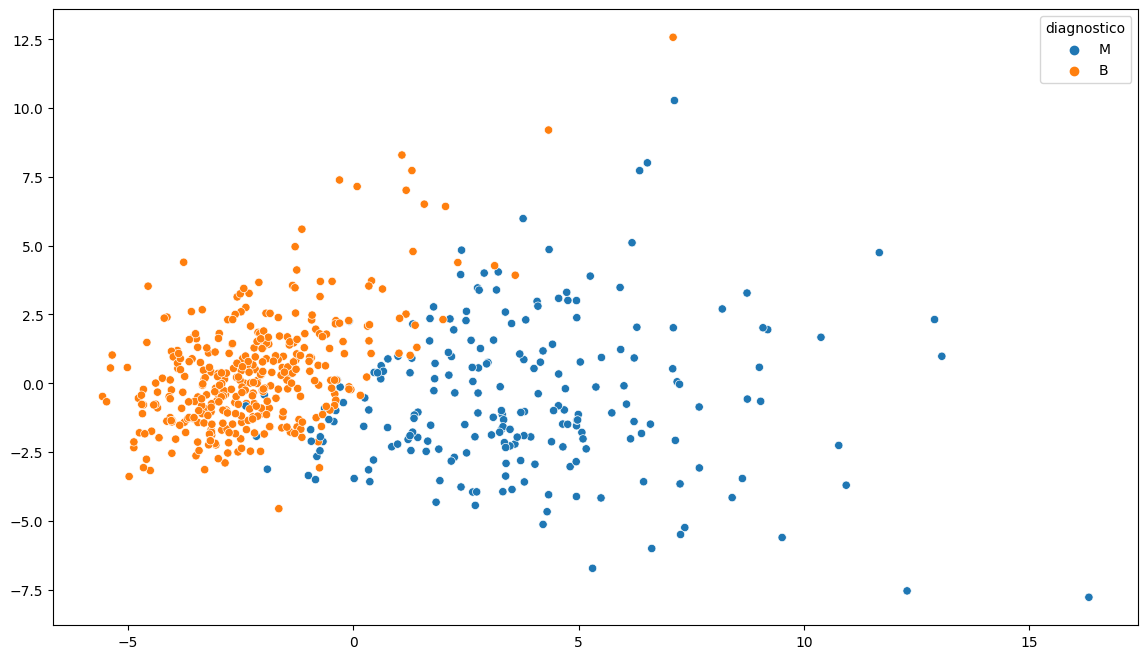

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

x7 = pca.fit_transform(x2)

plt.figure(figsize=(14, 8))
sns.scatterplot(x=x7[:, 0], y=x7[:, 1], hue=y)

In [36]:
create_model(x7)
x7.shape

Resultado da acurácia é 90.05847953216374%


(569, 2)

<Axes: >

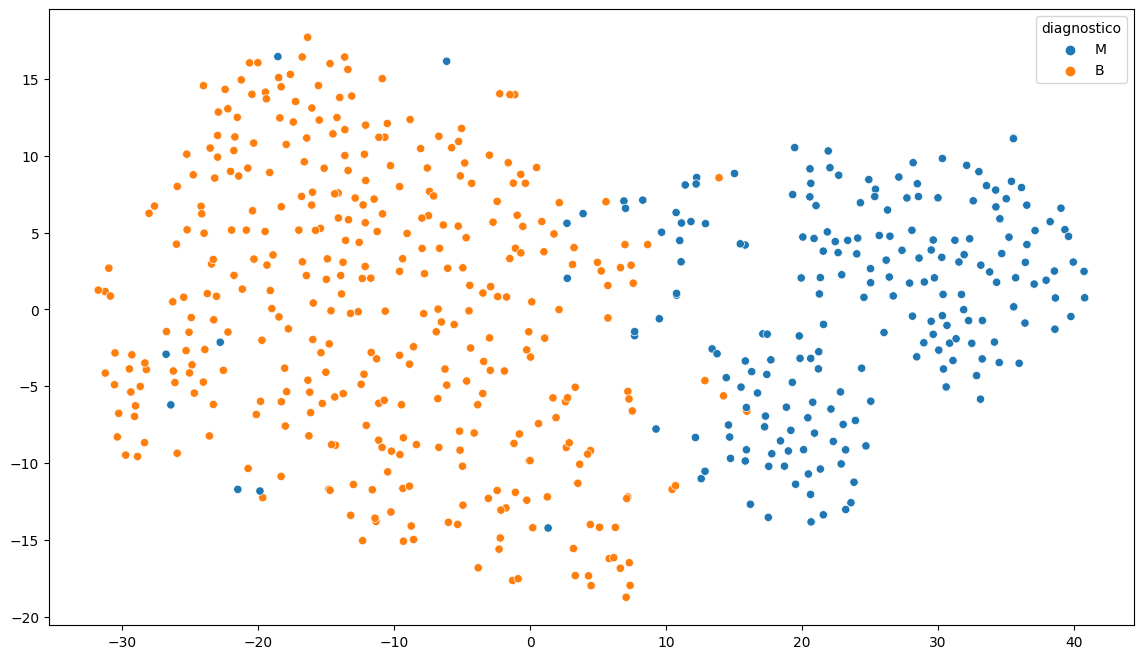

In [38]:
from sklearn.manifold import TSNE

tsne = TSNE (n_components=2)
x8 = tsne.fit_transform(x2)

plt.figure(figsize=(14, 8))
sns.scatterplot(x=x8[:, 0], y=x8[:, 1], hue=y)

In [39]:
create_model(x8)

Resultado da acurácia é 95.32163742690058%
